In [1]:
import numpy as np
np.random.seed(210187)
import matplotlib.pyplot as plt

nbins = 5
xrange = (0.95, 1.00)

bkg_labels = ['bb','cc','ss','ud']
nbkgs = len(bkg_labels)

bkg_expectation = np.random.normal(1, 0.05, size=(nbkgs, nbins))



In [2]:
print(bkg_expectation)

[[1.02342657 1.08434444 0.95551759 0.9682423  0.94031325]
 [0.93223441 0.97328378 1.02042993 0.95748625 1.06036881]
 [1.02374548 1.0274038  1.01520871 0.98376604 0.95840305]
 [1.0922601  1.00965117 1.05635921 1.06615125 0.99970441]]


In [3]:
print( np.sum(bkg_expectation, axis=1) )


[4.97184414 4.94380317 5.00852709 5.22412614]


In [4]:
# normalise each background so that it sums to unity across the bins
bkg_expectation = bkg_expectation / np.sum(bkg_expectation, axis=1).reshape(-1,1)

In [5]:
print(bkg_expectation)

[[0.20584446 0.21809703 0.19218575 0.1947451  0.18912766]
 [0.18856625 0.19686944 0.20640586 0.19367402 0.21448443]
 [0.20440051 0.20513093 0.20269606 0.19641823 0.19135427]
 [0.20907996 0.193267   0.20220783 0.20408222 0.19136299]]


In [6]:
np.sum( bkg_expectation, axis=1 )

array([1., 1., 1., 1.])

<BarContainer object of 5 artists>

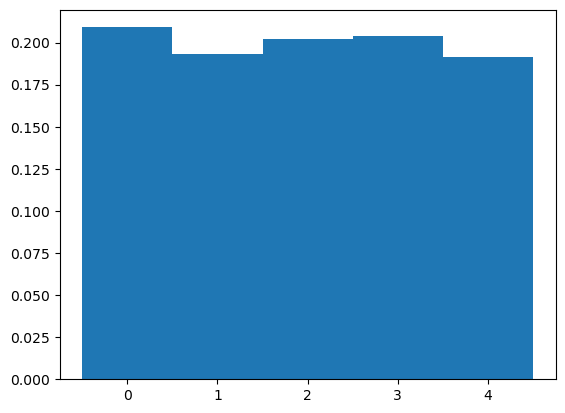

In [7]:
fig, ax = plt.subplots()
ax.bar( np.arange(nbins), bkg_expectation[3], width=1 )

In [8]:
# now i can make the total background expectation 
Nz = (6e10, 10)

bkg_bfs = np.array([
    [0.1512, 0.0005],
    [0.1203, 0.0021],
    [0.1584, 0.0060],
    [0.2701, 0.0136]
])

bkg_effs = np.array([
    [0.008701, 0.000006],
    [0.005605, 0.000005],
    [0.007871, 0.000006],
    [0.002103, 0.000003],
])

In [9]:
## make the total background prediction and track its err
N_bkg = Nz[0] * bkg_bfs[:,0][:,np.newaxis] * bkg_effs[:,0][:,np.newaxis] * bkg_expectation

# error on Nz * BF * eff
rel_factor_err_sq = (Nz[1] / Nz[0])**2 + ( bkg_bfs[:,1] / bkg_bfs[:,0] )**2 + ( bkg_effs[:,1] / bkg_effs[:,0] )**2
print(rel_factor_err_sq)

N_bkg_err = N_bkg * rel_factor_err_sq[:, np.newaxis]**0.5

[1.14109591e-05 3.05520245e-04 1.43538366e-03 2.53733086e-03]


In [10]:
np.sum(N_bkg, axis=1)

array([78935472., 40456890., 74805984., 34081218.])

In [11]:
total_bkg = np.sum(N_bkg, axis=0)
total_bkg_err = np.sum(N_bkg_err**2, axis=0)**0.5
print(total_bkg)
print(total_bkg_err)

[46293314.34485389 47112112.8296195  45575179.27963837 44856375.02636135
 44442582.51952691]
[696573.45981102 686174.98834496 688801.97326906 673862.1911492
 653902.16805328]


bb 78935472.0
cc 40456890.0
ss 74805984.0
ud 34081218.0


Text(0.5, 0, 'Fit Variable')

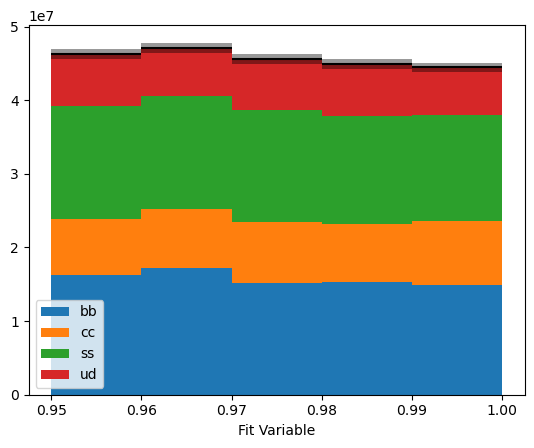

In [12]:
import matplotlib.patches as patches
fig, ax = plt.subplots()
bottom = np.zeros(nbins)
xe = np.linspace(*xrange, nbins+1)
cx = 0.5 * (xe[:-1] + xe[1:] )
bw = xe[1:] - xe[:-1]

for ibkg in range(nbkgs):
    print( bkg_labels[ibkg], np.sum(N_bkg[ibkg]) )
    #ax.bar( cx, N_bkg[ibkg], width=bw, alpha=0.2, label=bkg_labels[ibkg])
    #ax.errorbar( cx, N_bkg[ibkg], yerr=N_bkg_err[ibkg], xerr=bw/2, ls='None' )
    ax.bar( cx, N_bkg[ibkg], width=bw, bottom=bottom, label=bkg_labels[ibkg] )
    bottom += N_bkg[ibkg]

for xi, yi, xe, ye in zip(cx, total_bkg, bw/2, total_bkg_err):
    rect = patches.Rectangle((xi - xe, yi - ye), 2*xe, 2*ye,
                             edgecolor='none', facecolor='k', alpha=0.4, lw=2)
    ax.add_patch(rect)
    
ax.errorbar( cx, total_bkg, yerr=0, xerr=bw/2, color='k', ls='None')

ax.legend()
ax.set_xlabel('Fit Variable')

<ErrorbarContainer object of 3 artists>

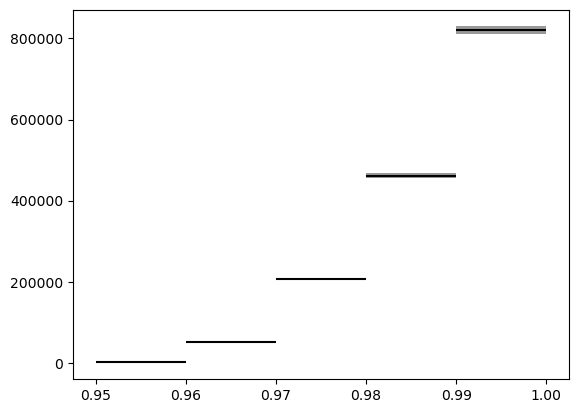

In [13]:
# now do something for the signal
sig_expectation = np.arange(nbins)**2 / 2 + 0.01
sig_expectation = sig_expectation / np.sum(sig_expectation)

sig_eff = (0.8851, 0.0002)
prod_frac = (0.096, 0.001)
sig_bf = 1e-3

# formula for Ns
total_sig = Nz[0] * bkg_bfs[0,0] * 2 * prod_frac[0] * sig_bf * sig_eff[0] * sig_expectation
rel_factor_err_sq = (Nz[1]/Nz[0])**2 + (bkg_bfs[0,1]/bkg_bfs[0,0])**2 + (prod_frac[1]/prod_frac[0])**2 + (sig_eff[1]/sig_eff[0])**2
total_sig_err = total_sig * rel_factor_err_sq**0.5

fig, ax = plt.subplots()
for xi, yi, xe, ye in zip(cx, total_sig, bw/2, total_sig_err):
    rect = patches.Rectangle((xi - xe, yi - ye), 2*xe, 2*ye,
                             edgecolor='none', facecolor='k', alpha=0.4, lw=2)
    ax.add_patch(rect)
    
ax.errorbar( cx, total_sig, yerr=0, xerr=bw/2, color='k', ls='None')


In [14]:
poisson_expectation = total_bkg + total_sig

    

In [15]:
# throw toy
toy_data = np.random.poisson( poisson_expectation )

<ErrorbarContainer object of 3 artists>

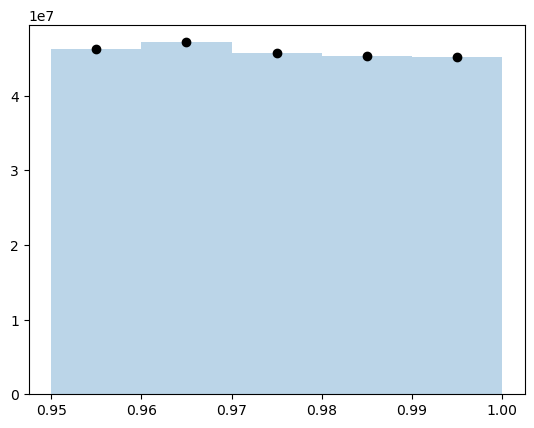

In [16]:
fig, ax = plt.subplots()
ax.bar( cx, poisson_expectation, width=bw, alpha=0.3, label='Total Expectation')
ax.errorbar( cx, toy_data, toy_data**0.5, fmt='ko', label='Toy Data')

In [17]:
average_background_error = np.mean( total_bkg_err / total_bkg )
print( average_background_error )

0.014892258429323093


In [23]:
from scipy.stats import poisson, norm

## fit the toy (this is the negative log likelihood that I want to minimize)
def poisson_likelihood(sc_b, sc_s):
    expectation = sc_b * total_bkg + sc_s * total_sig
    
    poiss_term = -np.sum( poisson.logpmf( toy_data, expectation) )
    bkg_constraint_term = -norm.logpdf( sc_b, 1, average_background_error )
    return poiss_term + bkg_constraint_term

def plot(sc_b, sc_s):
    bkg = sc_b * total_bkg 
    sig = sc_s * total_sig
    
    fig, ax = plt.subplots()
    ax.errorbar( cx, toy_data, toy_data**0.5, fmt='ko' )
    ax.bar( cx, bkg, width=bw, alpha=0.4 )
    ax.bar( cx, sig, width=bw, bottom=bkg, alpha=0.4)

In [19]:
from iminuit import Minuit

mi = Minuit( poisson_likelihood, sc_b=1, sc_s=1 )
#mi.fixed['sc_b'] = True
mi.migrad()
mi.hesse()
print(mi)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 47.93                      │              Nfcn = 55               │
│ EDM = 6.79e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

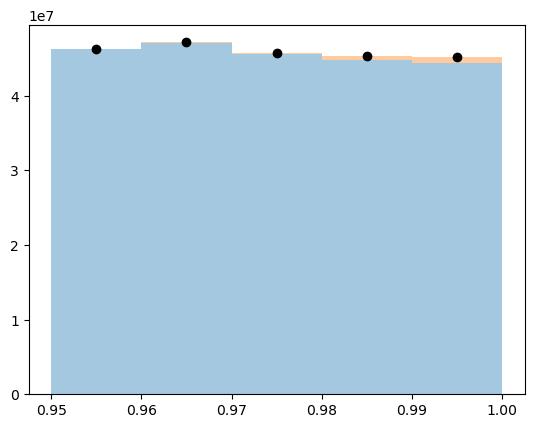

In [20]:
plot( mi.values['sc_b'], mi.values['sc_s'] )